<a href="https://colab.research.google.com/github/krishnaap/Atmospheric_data_archive/blob/main/Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import datetime, timedelta
from siphon.catalog import TDSCatalog

# Get the GFS dataset via the THREDDS Data Server
catalog_url = 'https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p25deg/latest.xml'
cat = TDSCatalog(catalog_url)
ncss = cat.datasets[0].subset()

# Define the time range (-6 hours to +6 hours from now)
now = datetime.utcnow()
start_time = now - timedelta(hours=6)
end_time = now + timedelta(hours=6)

# Create the query for the desired data
query = ncss.query()
query.time_range(start_time, end_time)
query.accept('netcdf4')
query.variables('u-component_of_wind_isobaric', 'v-component_of_wind_isobaric', 'Precipitation_rate_surface')
query.add_lonlat()
query.vertical_level(85000)  # 850 hPa in Pa

# Define the geographical bounds (Gulf of Mexico and southern USA)
query.lonlat_box(north=35, south=15, east=-75, west=-100)

# Request the data
data = ncss.get_data(query)

# Open the dataset using xarray
ds = xr.open_dataset(xr.backends.NetCDF4DataStore(data))

# Extract variables
u = ds['u-component_of_wind_isobaric']
v = ds['v-component_of_wind_isobaric']
precip = ds['Precipitation_rate_surface']

# Calculate wind speed
wind_speed = np.sqrt(u**2 + v**2)

# Set up the plot
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

def animate(i):
    ax.clear()
    ax.set_extent([-100, -75, 15, 35], crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES, linewidth=0.5)
    ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')
    ax.add_feature(cfeature.OCEAN, zorder=0)

    time = wind_speed.time.values[i]
    u_i = u.isel(time=i)
    v_i = v.isel(time=i)
    wind_speed_i = wind_speed.isel(time=i)
    precip_i = precip.isel(time=i)

    # Plot wind speed
    wind_levels = np.linspace(0, 50, 21)
    wind_contour = ax.contourf(u_i.lon, u_i.lat, wind_speed_i, levels=wind_levels, cmap='jet', transform=ccrs.PlateCarree())

    # Plot precipitation
    precip_levels = np.linspace(0, 20, 11)
    precip_contour = ax.contour(u_i.lon, u_i.lat, precip_i * 3600, levels=precip_levels, colors='white', linewidths=1, transform=ccrs.PlateCarree())

    # Plot wind barbs
    skip = (slice(None, None, 5), slice(None, None, 5))
    ax.quiver(u_i.lon.values[skip[1]], u_i.lat.values[skip[0]], u_i.values[skip], v_i.values[skip], scale=700, transform=ccrs.PlateCarree())

    # Add colorbar
    cbar = fig.colorbar(wind_contour, ax=ax, orientation='vertical', pad=0.02, shrink=0.8)
    cbar.set_label('Wind Speed (m/s)')

    # Add title
    ax.set_title('850 hPa Wind Speed and Precipitation\nTime: {}'.format(np.datetime_as_string(time, unit='h')))

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=len(wind_speed.time), interval=500, repeat=False)

# Save the animation as an MP4 file
ani.save('gfs_animation.mp4', writer='ffmpeg', dpi=200)

# Alternatively, display the plot (if running interactively)
# plt.show()

AttributeError: 'bytes' object has no attribute 'acquire_context'

AttributeError: 'DataArray' object has no attribute 'time'

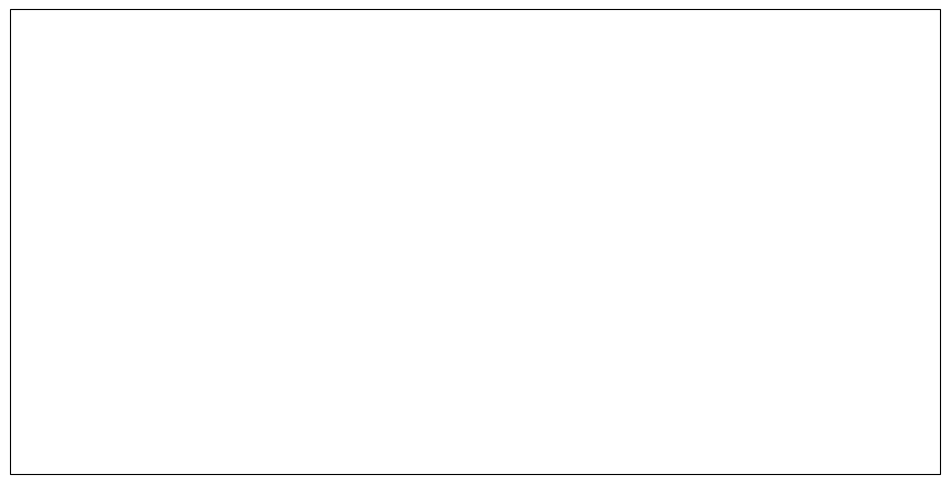

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import datetime, timedelta
from siphon.catalog import TDSCatalog
from io import BytesIO  # Added import

# Get the GFS dataset via the THREDDS Data Server
catalog_url = 'https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p25deg/latest.xml'
cat = TDSCatalog(catalog_url)
ncss = cat.datasets[0].subset()

# Define the time range (-6 hours to +6 hours from now)
now = datetime.utcnow()
start_time = now - timedelta(hours=6)
end_time = now + timedelta(hours=6)

# Create the query for the desired data
query = ncss.query()
query.time_range(start_time, end_time)
query.accept('netcdf4')
query.variables('u-component_of_wind_isobaric', 'v-component_of_wind_isobaric', 'Precipitation_rate_surface')
query.add_lonlat()
query.vertical_level(85000)  # 850 hPa in Pa

# Define the geographical bounds (Gulf of Mexico and southern USA)
query.lonlat_box(north=35, south=15, east=-75, west=-100)

# Request the data
data = ncss.get_data(query)

# Open the dataset using xarray
ds = xr.open_dataset(BytesIO(data))  # Corrected line

# Extract variables
u = ds['u-component_of_wind_isobaric']
v = ds['v-component_of_wind_isobaric']
precip = ds['Precipitation_rate_surface']

# Calculate wind speed
wind_speed = np.sqrt(u**2 + v**2)

# Set up the plot
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

def animate(i):
    ax.clear()
    ax.set_extent([-100, -75, 15, 35], crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES, linewidth=0.5)
    ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')
    ax.add_feature(cfeature.OCEAN, zorder=0)

    time = wind_speed.time.values[i]
    u_i = u.isel(time=i)
    v_i = v.isel(time=i)
    wind_speed_i = wind_speed.isel(time=i)
    precip_i = precip.isel(time=i)

    # Plot wind speed
    wind_levels = np.linspace(0, 50, 21)
    wind_contour = ax.contourf(u_i.lon, u_i.lat, wind_speed_i, levels=wind_levels, cmap='jet', transform=ccrs.PlateCarree())

    # Plot precipitation
    precip_levels = np.linspace(0, 20, 11)
    precip_contour = ax.contour(u_i.lon, u_i.lat, precip_i * 3600, levels=precip_levels, colors='white', linewidths=1, transform=ccrs.PlateCarree())

    # Plot wind barbs
    skip = (slice(None, None, 5), slice(None, None, 5))
    ax.quiver(u_i.lon.values[skip[1]], u_i.lat.values[skip[0]], u_i.values[skip], v_i.values[skip], scale=700, transform=ccrs.PlateCarree())

    # Add colorbar
    cbar = fig.colorbar(wind_contour, ax=ax, orientation='vertical', pad=0.02, shrink=0.8)
    cbar.set_label('Wind Speed (m/s)')

    # Add title
    ax.set_title('850 hPa Wind Speed and Precipitation\nTime: {}'.format(np.datetime_as_string(time, unit='h')))

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=len(wind_speed.time), interval=500, repeat=False)

# Save the animation as an MP4 file
ani.save('gfs_animation.mp4', writer='ffmpeg', dpi=200)

# Alternatively, display the plot (if running interactively)
# plt.show()

<xarray.Dataset> Size: 492kB
Dimensions:                        (time2: 5, latitude: 81, isobaric: 1,
                                    longitude: 101)
Coordinates:
  * time2                          (time2) datetime64[ns] 40B 2024-11-14T03:0...
    reftime                        datetime64[ns] 8B ...
  * latitude                       (latitude) float32 324B 35.0 34.75 ... 15.0
  * isobaric                       (isobaric) float64 8B 8.5e+04
  * longitude                      (longitude) float32 404B 260.0 ... 285.0
Data variables:
    Precipitation_rate_surface     (time2, latitude, longitude) float32 164kB ...
    u-component_of_wind_isobaric   (time2, isobaric, latitude, longitude) float32 164kB ...
    v-component_of_wind_isobaric   (time2, isobaric, latitude, longitude) float32 164kB ...
    LatLon_721X1440-0p13S-180p00E  int32 4B ...
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:    

AttributeError: 'DataArray' object has no attribute 'lon'

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Do

Error in callback <function _draw_all_if_interactive at 0x7c15fa6424d0> (for post_execute):


AttributeError: 'DataArray' object has no attribute 'lon'

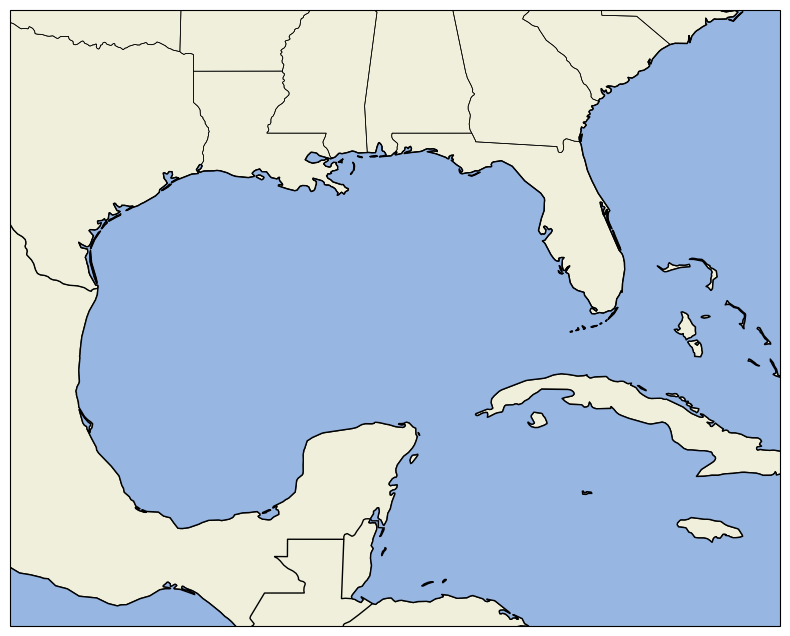

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import datetime, timedelta
from siphon.catalog import TDSCatalog
from io import BytesIO

# Get the GFS dataset via the THREDDS Data Server
catalog_url = 'https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p25deg/latest.xml'
cat = TDSCatalog(catalog_url)
ncss = cat.datasets[0].subset()

# Define the time range (-6 hours to +6 hours from now)
now = datetime.utcnow()
start_time = now - timedelta(hours=6)
end_time = now + timedelta(hours=6)

# Create the query for the desired data
query = ncss.query()
# Use all available times within the dataset
query.time_range(start_time, end_time)
query.accept('netcdf4')
query.variables('u-component_of_wind_isobaric', 'v-component_of_wind_isobaric', 'Precipitation_rate_surface')
query.add_lonlat()
query.vertical_level(85000)  # 850 hPa in Pa

# Define the geographical bounds (Gulf of Mexico and southern USA)
query.lonlat_box(north=35, south=15, east=-75, west=-100)

# Request the data
data = ncss.get_data(query)

# Open the dataset using xarray
ds = xr.open_dataset(BytesIO(data))

# Print dataset information for debugging
print(ds)
print("Variables and dimensions:")
for var in ds.data_vars:
    print(f"{var}: dimensions {ds[var].dims}")

# Extract variables
u = ds['u-component_of_wind_isobaric']
v = ds['v-component_of_wind_isobaric']
precip = ds['Precipitation_rate_surface']

# Check if 'time' is a dimension
time_dim = None
for dim in u.dims:
    if 'time' in dim.lower():
        time_dim = dim
        break

if time_dim is None:
    raise ValueError("Time dimension not found in data variables.")

# Calculate wind speed
wind_speed = np.sqrt(u**2 + v**2)

# Set up the plot
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

def animate(i):
    ax.clear()
    ax.set_extent([-100, -75, 15, 35], crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES, linewidth=0.5)
    ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')
    ax.add_feature(cfeature.OCEAN, zorder=0)

    time = wind_speed[time_dim].values[i]
    u_i = u.isel({time_dim: i})
    v_i = v.isel({time_dim: i})
    wind_speed_i = wind_speed.isel({time_dim: i})
    precip_i = precip.isel({time_dim: i})

    # Plot wind speed
    wind_levels = np.linspace(0, 50, 21)
    wind_contour = ax.contourf(u_i.lon, u_i.lat, wind_speed_i, levels=wind_levels, cmap='jet', transform=ccrs.PlateCarree())

    # Plot precipitation
    precip_levels = np.linspace(0, 20, 11)
    precip_contour = ax.contour(u_i.lon, u_i.lat, precip_i * 3600, levels=precip_levels, colors='white', linewidths=1, transform=ccrs.PlateCarree())

    # Plot wind barbs
    skip = (slice(None, None, 5), slice(None, None, 5))
    ax.quiver(u_i.lon.values[skip[1]], u_i.lat.values[skip[0]], u_i.values[skip], v_i.values[skip], scale=700, transform=ccrs.PlateCarree())

    # Add colorbar
    cbar = fig.colorbar(wind_contour, ax=ax, orientation='vertical', pad=0.02, shrink=0.8)
    cbar.set_label('Wind Speed (m/s)')

    # Add title
    ax.set_title('850 hPa Wind Speed and Precipitation\nTime: {}'.format(np.datetime_as_string(time, unit='h')))

# Create the animation
frames = len(wind_speed[time_dim])
ani = animation.FuncAnimation(fig, animate, frames=frames, interval=500, repeat=False)

# Save the animation as an MP4 file
ani.save('gfs_animation.mp4', writer='ffmpeg', dpi=200)

# Alternatively, display the plot (if running interactively)
# plt.show()

<xarray.Dataset> Size: 492kB
Dimensions:                        (time2: 5, latitude: 81, isobaric: 1,
                                    longitude: 101)
Coordinates:
  * time2                          (time2) datetime64[ns] 40B 2024-11-14T03:0...
    reftime                        datetime64[ns] 8B ...
  * latitude                       (latitude) float32 324B 35.0 34.75 ... 15.0
  * isobaric                       (isobaric) float64 8B 8.5e+04
  * longitude                      (longitude) float32 404B 260.0 ... 285.0
Data variables:
    Precipitation_rate_surface     (time2, latitude, longitude) float32 164kB ...
    u-component_of_wind_isobaric   (time2, isobaric, latitude, longitude) float32 164kB ...
    v-component_of_wind_isobaric   (time2, isobaric, latitude, longitude) float32 164kB ...
    LatLon_721X1440-0p13S-180p00E  int32 4B ...
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:    

TypeError: Input z must be 2D, not 3D

Error in callback <function _draw_all_if_interactive at 0x7c15fa6424d0> (for post_execute):


TypeError: Input z must be 2D, not 3D

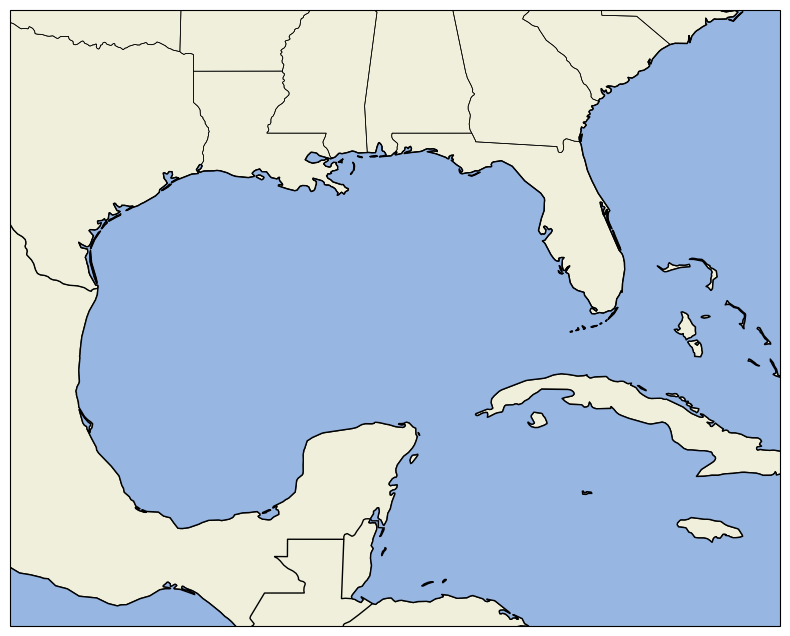

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import datetime, timedelta
from siphon.catalog import TDSCatalog
from io import BytesIO

# Get the GFS dataset via the THREDDS Data Server
catalog_url = 'https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p25deg/latest.xml'
cat = TDSCatalog(catalog_url)
ncss = cat.datasets[0].subset()

# Define the time range (-6 hours to +6 hours from now)
now = datetime.utcnow()
start_time = now - timedelta(hours=6)
end_time = now + timedelta(hours=6)

# Create the query for the desired data
query = ncss.query()
# Use all available times within the dataset
query.time_range(start_time, end_time)
query.accept('netcdf4')
query.variables('u-component_of_wind_isobaric', 'v-component_of_wind_isobaric', 'Precipitation_rate_surface')
query.add_lonlat()
query.vertical_level(85000)  # 850 hPa in Pa

# Define the geographical bounds (Gulf of Mexico and southern USA)
query.lonlat_box(north=35, south=15, east=-75, west=-100)

# Request the data
data = ncss.get_data(query)

# Open the dataset using xarray
ds = xr.open_dataset(BytesIO(data))

# Print dataset information for debugging
print(ds)
print("\nDataset dimensions:", ds.dims)
print("\nDataset coordinates:", ds.coords)
print("\nData variables:")
for var in ds.data_vars:
    print(f"{var}: dimensions {ds[var].dims}, coordinates {list(ds[var].coords)}")

# Extract variables
u = ds['u-component_of_wind_isobaric']
v = ds['v-component_of_wind_isobaric']
precip = ds['Precipitation_rate_surface']

# Identify time dimension
time_dim = None
for dim in u.dims:
    if 'time' in dim.lower():
        time_dim = dim
        break

if time_dim is None:
    raise ValueError("Time dimension not found in data variables.")

# Identify latitude and longitude coordinate names
lat_name = None
lon_name = None
for coord in u.coords:
    if 'lat' in coord.lower():
        lat_name = coord
    if 'lon' in coord.lower():
        lon_name = coord

if lat_name is None or lon_name is None:
    raise ValueError("Latitude and/or longitude coordinates not found in data variables.")

# Calculate wind speed
wind_speed = np.sqrt(u**2 + v**2)

# Set up the plot
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

def animate(i):
    ax.clear()
    ax.set_extent([-100, -75, 15, 35], crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES, linewidth=0.5)
    ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')
    ax.add_feature(cfeature.OCEAN, zorder=0)

    time = wind_speed[time_dim].values[i]
    u_i = u.isel({time_dim: i})
    v_i = v.isel({time_dim: i})
    wind_speed_i = wind_speed.isel({time_dim: i})
    precip_i = precip.isel({time_dim: i})

    # Plot wind speed
    wind_levels = np.linspace(0, 50, 21)
    wind_contour = ax.contourf(
        u_i[lon_name],
        u_i[lat_name],
        wind_speed_i,
        levels=wind_levels,
        cmap='jet',
        transform=ccrs.PlateCarree()
    )

    # Plot precipitation
    precip_levels = np.linspace(0, 20, 11)
    precip_contour = ax.contour(
        u_i[lon_name],
        u_i[lat_name],
        precip_i * 3600,
        levels=precip_levels,
        colors='white',
        linewidths=1,
        transform=ccrs.PlateCarree()
    )

    # Plot wind barbs
    skip = (slice(None, None, 5), slice(None, None, 5))
    ax.quiver(
        u_i[lon_name].values[skip[1]],
        u_i[lat_name].values[skip[0]],
        u_i.values[skip],
        v_i.values[skip],
        scale=700,
        transform=ccrs.PlateCarree()
    )

    # Add colorbar
    cbar = fig.colorbar(wind_contour, ax=ax, orientation='vertical', pad=0.02, shrink=0.8)
    cbar.set_label('Wind Speed (m/s)')

    # Add title
    ax.set_title('850 hPa Wind Speed and Precipitation\nTime: {}'.format(np.datetime_as_string(time, unit='h')))

# Create the animation
frames = len(wind_speed[time_dim])
ani = animation.FuncAnimation(fig, animate, frames=frames, interval=500, repeat=False)

# Save the animation as an MP4 file
ani.save('gfs_animation.mp4', writer='ffmpeg', dpi=200)

# Alternatively, display the plot (if running interactively)
# plt.show()

In [ ]:
!pip install xarray

In [ ]:
!pip install siphon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 1.9 MB/s eta 0:00:00


In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 78.7 MB/s eta 0:00:00


!pip install ***netcdf4***

In [ ]:
!pip install netcdf4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.1 MB/s eta 0:00:00


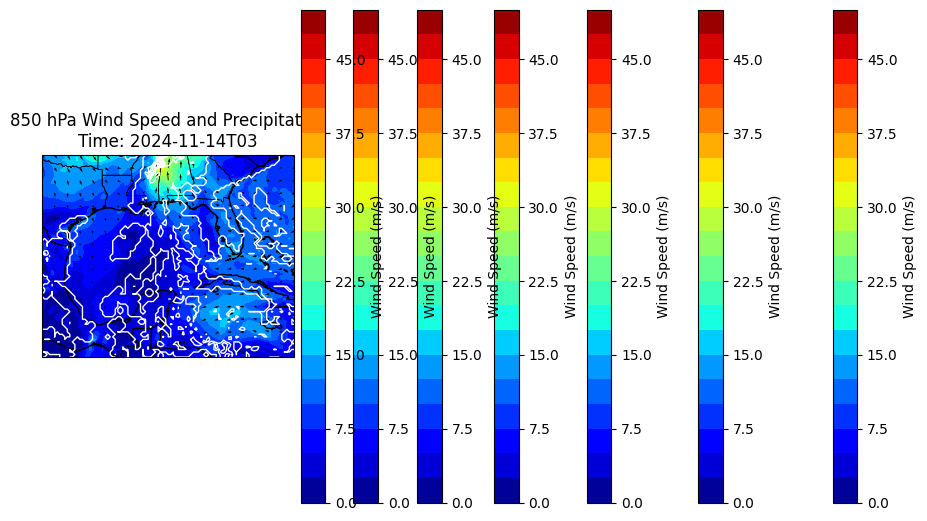

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import datetime, timedelta
from siphon.catalog import TDSCatalog
from io import BytesIO

# Get the GFS dataset via the THREDDS Data Server
catalog_url = 'https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p25deg/latest.xml'
cat = TDSCatalog(catalog_url)
ncss = cat.datasets[0].subset()

# Define the time range (-6 hours to +6 hours from now)
now = datetime.utcnow()
start_time = now - timedelta(hours=6)
end_time = now + timedelta(hours=6)

# Create the query for the desired data
query = ncss.query()
query.time_range(start_time, end_time)
query.accept('netcdf4')
query.variables('u-component_of_wind_isobaric', 'v-component_of_wind_isobaric', 'Precipitation_rate_surface')
query.add_lonlat()
query.vertical_level(85000)  # 850 hPa in Pa

# Define the geographical bounds (Gulf of Mexico and southern USA)
query.lonlat_box(north=35, south=15, east=-75, west=-100)

# Request the data
data = ncss.get_data(query)

# Open the dataset using xarray
ds = xr.open_dataset(BytesIO(data))

# Extract variables
u = ds['u-component_of_wind_isobaric']
v = ds['v-component_of_wind_isobaric']
precip = ds['Precipitation_rate_surface']

# Identify time dimension
time_dim = None
for dim in u.dims:
    if 'time' in dim.lower():
        time_dim = dim
        break

if time_dim is None:
    raise ValueError("Time dimension not found in data variables.")

# Identify latitude and longitude coordinate names
lat_name = 'latitude'
lon_name = 'longitude'

# Squeeze out the singleton 'isobaric' dimension
u = u.squeeze('isobaric')
v = v.squeeze('isobaric')

# Calculate wind speed
wind_speed = np.sqrt(u**2 + v**2)

# Set up the plot
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

def animate(i):
    ax.clear()
    ax.set_extent([-100, -75, 15, 35], crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES, linewidth=0.5)
    ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')
    ax.add_feature(cfeature.OCEAN, zorder=0)

    time = wind_speed[time_dim].values[i]
    u_i = u.isel({time_dim: i})
    v_i = v.isel({time_dim: i})
    wind_speed_i = wind_speed.isel({time_dim: i})
    precip_i = precip.isel({time_dim: i})

    # Plot wind speed
    wind_levels = np.linspace(0, 50, 21)
    wind_contour = ax.contourf(
        u_i[lon_name],
        u_i[lat_name],
        wind_speed_i,
        levels=wind_levels,
        cmap='jet',
        transform=ccrs.PlateCarree()
    )

    # Plot precipitation
    precip_levels = np.linspace(0, 20, 11)
    precip_contour = ax.contour(
        precip_i[lon_name],
        precip_i[lat_name],
        precip_i * 3600,  # Convert to mm/hr
        levels=precip_levels,
        colors='white',
        linewidths=1,
        transform=ccrs.PlateCarree()
    )

    # Plot wind barbs
    skip = (slice(None, None, 5), slice(None, None, 5))
    ax.quiver(
        u_i[lon_name].values[skip[1]],
        u_i[lat_name].values[skip[0]],
        u_i.values[skip],
        v_i.values[skip],
        scale=700,
        transform=ccrs.PlateCarree()
    )

    # Add colorbar
    cbar = fig.colorbar(wind_contour, ax=ax, orientation='vertical', pad=0.02, shrink=0.8)
    cbar.set_label('Wind Speed (m/s)')

    # Add title
    ax.set_title('850 hPa Wind Speed and Precipitation\nTime: {}'.format(np.datetime_as_string(time, unit='h')))

# Create the animation
frames = len(wind_speed[time_dim])
ani = animation.FuncAnimation(fig, animate, frames=frames, interval=500, repeat=False)

# Save the animation as an MP4 file
ani.save('gfs_animation.mp4', writer='ffmpeg', dpi=200)

# Alternatively, display the plot (if running interactively)
# plt.show()

<ipython-input-14-f33fee1530a8>:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in wind_contour.collections:
<ipython-input-14-f33fee1530a8>:121: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in precip_contour.collections:
<ipython-input-14-f33fee1530a8>:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in wind_contour.collections:
<ipython-input-14-f33fee1530a8>:121: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in precip_contour.collections:
<ipython-input-14-f33fee1530a8>:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor rele

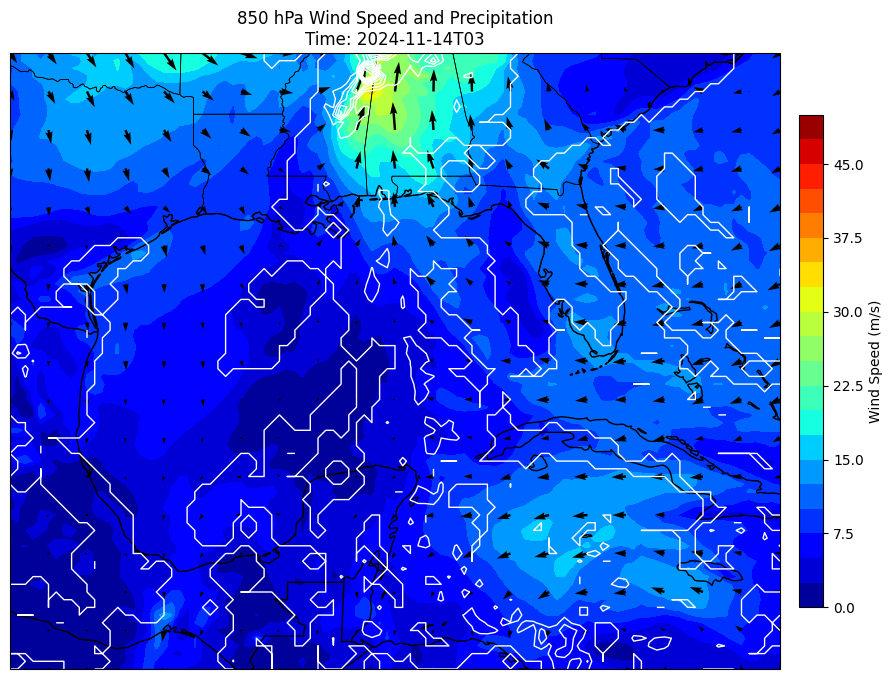

In [14]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import datetime, timedelta
from siphon.catalog import TDSCatalog
from io import BytesIO

# Get the GFS dataset via the THREDDS Data Server
catalog_url = 'https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p25deg/latest.xml'
cat = TDSCatalog(catalog_url)
ncss = cat.datasets[0].subset()

# Define the time range (-6 hours to +6 hours from now)
now = datetime.utcnow()
start_time = now - timedelta(hours=6)
end_time = now + timedelta(hours=6)

# Create the query for the desired data
query = ncss.query()
query.time_range(start_time, end_time)
query.accept('netcdf4')
query.variables('u-component_of_wind_isobaric', 'v-component_of_wind_isobaric', 'Precipitation_rate_surface')
query.add_lonlat()
query.vertical_level(85000)  # 850 hPa in Pa

# Define the geographical bounds (Gulf of Mexico and southern USA)
query.lonlat_box(north=35, south=15, east=-75, west=-100)

# Request the data
data = ncss.get_data(query)

# Open the dataset using xarray
ds = xr.open_dataset(BytesIO(data))

# Extract variables
u = ds['u-component_of_wind_isobaric']
v = ds['v-component_of_wind_isobaric']
precip = ds['Precipitation_rate_surface']

# Identify time dimension
time_dim = 'time2'  # Adjusted based on dataset
lat_name = 'latitude'
lon_name = 'longitude'

# Squeeze out the singleton 'isobaric' dimension
u = u.squeeze('isobaric')
v = v.squeeze('isobaric')

# Calculate wind speed
wind_speed = np.sqrt(u**2 + v**2)

# Set up the plot
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the map extent and add features
ax.set_extent([-100, -75, 15, 35], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')
ax.add_feature(cfeature.OCEAN, zorder=0)

# Prepare initial data for the first frame
i = 0
u_i = u.isel({time_dim: i})
v_i = v.isel({time_dim: i})
wind_speed_i = wind_speed.isel({time_dim: i})
precip_i = precip.isel({time_dim: i})

# Plot initial wind speed contour
wind_levels = np.linspace(0, 50, 21)
wind_contour = ax.contourf(
    u_i[lon_name],
    u_i[lat_name],
    wind_speed_i,
    levels=wind_levels,
    cmap='jet',
    transform=ccrs.PlateCarree()
)

# Add colorbar once
cbar = fig.colorbar(wind_contour, ax=ax, orientation='vertical', pad=0.02, shrink=0.8)
cbar.set_label('Wind Speed (m/s)')

# Plot initial precipitation contour
precip_levels = np.linspace(0, 20, 11)
precip_contour = ax.contour(
    precip_i[lon_name],
    precip_i[lat_name],
    precip_i * 3600,  # Convert to mm/hr
    levels=precip_levels,
    colors='white',
    linewidths=1,
    transform=ccrs.PlateCarree()
)

# Plot initial wind barbs
skip = (slice(None, None, 5), slice(None, None, 5))
quiver = ax.quiver(
    u_i[lon_name].values[skip[1]],
    u_i[lat_name].values[skip[0]],
    u_i.values[skip],
    v_i.values[skip],
    scale=700,
    transform=ccrs.PlateCarree()
)

# Add title
time = wind_speed[time_dim].values[i]
title = ax.set_title('850 hPa Wind Speed and Precipitation\nTime: {}'.format(np.datetime_as_string(time, unit='h')))

def animate(i):
    global wind_contour, precip_contour, quiver, title
    # Remove previous contour plots and quiver
    for c in wind_contour.collections:
        c.remove()
    for c in precip_contour.collections:
        c.remove()
    quiver.remove()

    # Update data for the current frame
    u_i = u.isel({time_dim: i})
    v_i = v.isel({time_dim: i})
    wind_speed_i = wind_speed.isel({time_dim: i})
    precip_i = precip.isel({time_dim: i})

    # Plot wind speed
    wind_contour = ax.contourf(
        u_i[lon_name],
        u_i[lat_name],
        wind_speed_i,
        levels=wind_levels,
        cmap='jet',
        transform=ccrs.PlateCarree()
    )

    # Plot precipitation
    precip_contour = ax.contour(
        precip_i[lon_name],
        precip_i[lat_name],
        precip_i * 3600,  # Convert to mm/hr
        levels=precip_levels,
        colors='white',
        linewidths=1,
        transform=ccrs.PlateCarree()
    )

    # Plot wind barbs
    quiver = ax.quiver(
        u_i[lon_name].values[skip[1]],
        u_i[lat_name].values[skip[0]],
        u_i.values[skip],
        v_i.values[skip],
        scale=700,
        transform=ccrs.PlateCarree()
    )

    # Update title
    time = wind_speed[time_dim].values[i]
    title.set_text('850 hPa Wind Speed and Precipitation\nTime: {}'.format(np.datetime_as_string(time, unit='h')))

# Create the animation
frames = len(wind_speed[time_dim])
ani = animation.FuncAnimation(fig, animate, frames=frames, interval=500, repeat=False)

# Save the animation as an MP4 file
ani.save('gfs_animation.mp4', writer='ffmpeg', dpi=200)